In [39]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [2]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name'] = df['target'].apply(lambda x: iris.feature_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,sepal length (cm)
1,4.9,3.0,1.4,0.2,0,sepal length (cm)
2,4.7,3.2,1.3,0.2,0,sepal length (cm)
3,4.6,3.1,1.5,0.2,0,sepal length (cm)
4,5.0,3.6,1.4,0.2,0,sepal length (cm)


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

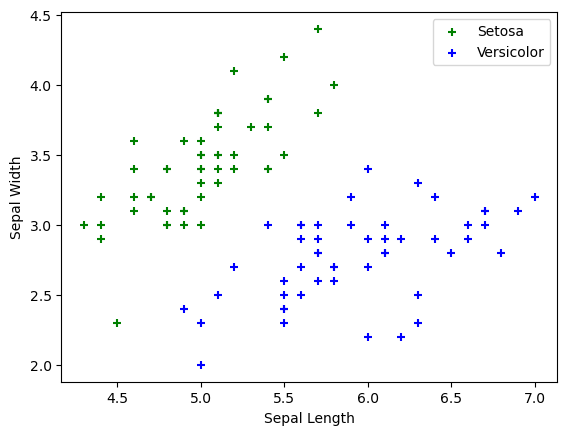

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], marker='+', color='green', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker='+', color='blue', label='Versicolor')
plt.legend()

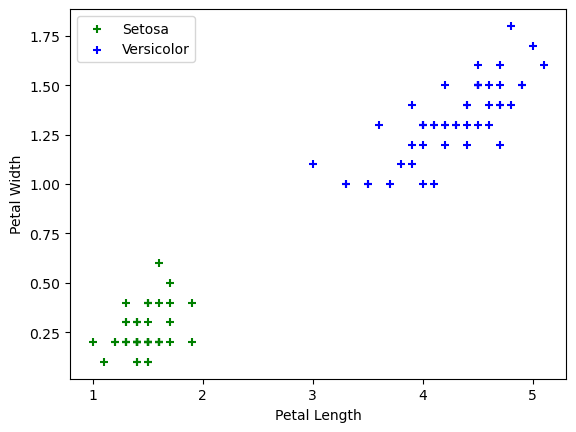

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], marker='+', color='green', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], marker='+', color='blue', label='Versicolor')
plt.legend()

#### Train-test split

In [16]:
X = df.drop(['target', 'flower_name'], axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
len(X_train)

120

In [19]:
len(X_test)

30

#### Create KNN (K-Nearest Neighbors Classifier) 

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.score(X_test, y_test)

0.9666666666666667

In [35]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

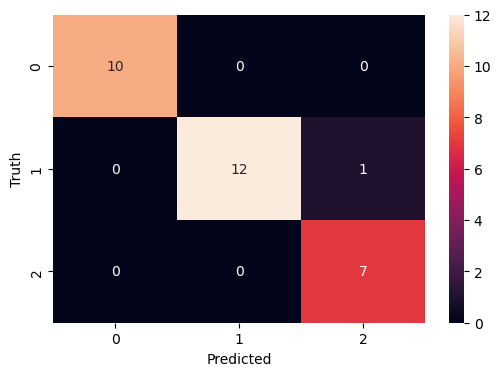

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Homework

In [43]:
digits = datasets.load_digits()
data = pd.DataFrame(digits.data, columns=digits.feature_names)
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [44]:
data['target'] = digits.target
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [50]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
knn_digits = KNeighborsClassifier(n_neighbors=3)
knn_digits.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
knn_digits.score(X_test.values, y_test.values)

0.9888888888888889

In [58]:
k_list = list(range(2, 100))
scores = {}
for k in k_list:
    knn_digits=KNeighborsClassifier(n_neighbors=k)
    knn_digits.fit(X_train, y_train)
    score = knn_digits.score(X_test.values, y_test.values)
    scores[k] = score
scores

{2: 0.9861111111111112,
 3: 0.9888888888888889,
 4: 0.9833333333333333,
 5: 0.9861111111111112,
 6: 0.9833333333333333,
 7: 0.9861111111111112,
 8: 0.9805555555555555,
 9: 0.9833333333333333,
 10: 0.9805555555555555,
 11: 0.9805555555555555,
 12: 0.9805555555555555,
 13: 0.9722222222222222,
 14: 0.975,
 15: 0.9722222222222222,
 16: 0.9722222222222222,
 17: 0.9694444444444444,
 18: 0.9722222222222222,
 19: 0.9694444444444444,
 20: 0.9666666666666667,
 21: 0.9611111111111111,
 22: 0.9638888888888889,
 23: 0.9555555555555556,
 24: 0.9555555555555556,
 25: 0.9583333333333334,
 26: 0.9555555555555556,
 27: 0.9527777777777777,
 28: 0.9527777777777777,
 29: 0.9611111111111111,
 30: 0.9555555555555556,
 31: 0.9527777777777777,
 32: 0.9555555555555556,
 33: 0.95,
 34: 0.95,
 35: 0.95,
 36: 0.9472222222222222,
 37: 0.9444444444444444,
 38: 0.9444444444444444,
 39: 0.9444444444444444,
 40: 0.9444444444444444,
 41: 0.9472222222222222,
 42: 0.9472222222222222,
 43: 0.9444444444444444,
 44: 0.944444

In [59]:
max(scores, key=scores.get)

3

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline([('scaler', scaler), ('knn', model)])
params = {'knn__n_neighbors': list(range(2, 100))}
clf = GridSearchCV(pipeline, params, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
print(f"Best score: {clf.best_score_}")
print(f"Best params: {clf.best_params_}")

Best score: 0.9735554587688734
Best params: {'knn__n_neighbors': 6}


In [71]:
knn_digits = KNeighborsClassifier(n_neighbors=3)
knn_digits.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
knn_digits.score(X_test.values, y_test.values)

0.9888888888888889

In [75]:
y_pred = knn_digits.predict(X_test.values)
cm_digits = confusion_matrix(y_test, y_pred)
cm_digits

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 38]], dtype=int64)

<Axes: >

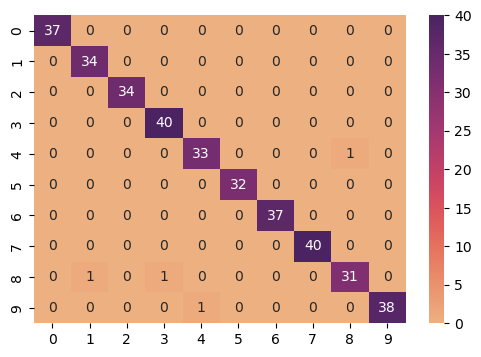

In [76]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_digits, annot=True, cmap='flare')
plt.xlabel('Predicted', 'Truth')

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        40
           4       0.97      0.97      0.97        34
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.97      0.94      0.95        33
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

